# S4- CASO PRACTICO-BDD FINAL

Elaborado: Wilson Moreno

## Importe la base de datos a una base en Jupyter Notebook con pandas. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

# ----------------------------------------
df = pd.read_csv("Walmart.csv")
df.rename({"Store":"Tienda","Date":"Fecha", "Weekly_Sales":"Ventas_Semanales",
          "Holiday_Flag": "vacaciones_bandera", "Temperature":"Temperatura",
          "Fuel_Price": "Precio_combustible", "CPI":"IPC", "Unemployment":"Desempleo"}, axis = 1, inplace=True)

df.head()

,Tienda,Fecha,Ventas_Semanales,vacaciones_bandera,Temperatura,Precio_combustible,IPC,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?

En la base de datos exiten: 
 - 7 variables numéricas
 - 1 variable categórica 

Resumen de variables numéricas

In [5]:
df.describe()

,Tienda,Ventas_Semanales,vacaciones_bandera,Temperatura,Precio_combustible,IPC,Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Resumen variable categorica

In [6]:
df.describe(include="object")

,Fecha
count,6435
unique,143
top,05-02-2010
freq,45


**¿hay algo que le llame la atención?**
Dentro de la base de datos la variable más heterogénea es Ventas semanales.

## Evalúe si la base contiene datos perdidos

In [7]:
df.isna().sum()

Tienda                0
Fecha                 0
Ventas_Semanales      0
vacaciones_bandera    0
Temperatura           0
Precio_combustible    0
IPC                   0
Desempleo             0
dtype: int64

Dentro de la base de datos no existen valores perdidos.

## ## Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir.

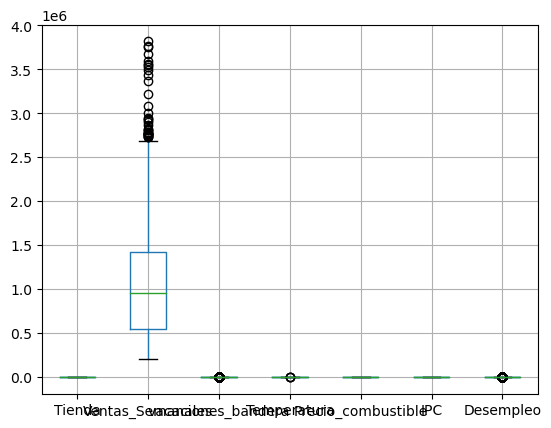

In [8]:
df.boxplot()
plt.show()

Como se puede observar las variables que tienen valores atípicos son: Ventas_semanales. Se procede a contar la cantidad de valores atípicos que tiene cada variable, para encontrar el mejor tratamiento para ellos. 

In [9]:
def count_outliers(datos):
    media = np.mean(datos)
    desviacion_estandar = np.std(datos)
    limite_inferior = media - (3 * desviacion_estandar)
    limite_superior = media + (3 * desviacion_estandar)
    outliers = [x for x in datos if x < limite_inferior or x > limite_superior]
    return len(outliers)

for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_outliers = count_outliers(df[col])
        print("Número de valores atípicos en", col, ":", num_outliers)

Número de valores atípicos en Tienda : 0
Número de valores atípicos en Ventas_Semanales : 31
Número de valores atípicos en vacaciones_bandera : 450
Número de valores atípicos en Temperatura : 1
Número de valores atípicos en Precio_combustible : 0
Número de valores atípicos en IPC : 0
Número de valores atípicos en Desempleo : 219


In [10]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        limite_inferior = q1 - (1.5 * iqr)
        limite_superior = q3 + (1.5 * iqr)
        df[col] = np.where(df[col] < limite_inferior, np.nan, df[col])
        df[col] = np.where(df[col] > limite_superior, np.nan, df[col])
        df[col] = df[col].fillna(df[col].median())

In [11]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_outliers = count_outliers(df[col])
        print("Número de valores atípicos en", col, ":", num_outliers)

Número de valores atípicos en Tienda : 0
Número de valores atípicos en Ventas_Semanales : 2
Número de valores atípicos en vacaciones_bandera : 0
Número de valores atípicos en Temperatura : 0
Número de valores atípicos en Precio_combustible : 0
Número de valores atípicos en IPC : 0
Número de valores atípicos en Desempleo : 0


Como se puede observar la nueva base de datos ya no consta de valores atípicos.

## Grafique las distribuciones de las variables y a priori comente sobre ellas.

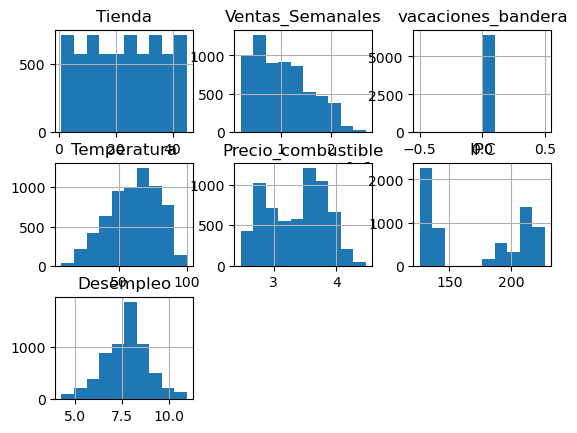

In [12]:
df.hist()
plt.show()

Para cada una de las variables se van a interpretar a priori con base en los siguientes puntos:

- Forma de la distribución: 
    - **Tienda:** Es asimétrica y tiene un valle muy extendido.
    - **Ventas_Semanales:** Es simétrica y tiene un pico muy cercano a 20
    - **Vacaciones_Bandera:** Es asimétricas con sesgo a la derecha
    - **Temperatura:** Es asimétrica y tiene un valle muy extendido.
    - **Precio_combustible:**  Es asimétrica y tiene un valle muy extendido.
    - **IPC:** Es asimétrica y tiene un valle muy extendido.
    - **Desempleto:** Es asimétrica y tiene un valle muy extendido.
- Centralidad:
    - **Tienda:** La media = 23.000000	 y mediana 23.000000 son similares
    - **Ventas_Semanales:** La media = 1.035714e+06	 y mediana 9.572983e+05 son similares
    - **Vacaciones_Bandera:** La media = 0.	 y mediana 0 son similares
    - **Temperatura:** La media = 60.691495	 y mediana 62.680000 son similares
    - **Precio_combustible:** La media = 3.358607	 y mediana 3.445000	 son similares
    - **IPC:** La media = 171.578394	 y mediana 182.616521 son similares
    - **Desempleto:** La media = 7.730398	 y mediana 7.852000 son similares
- Dispersión: 
    - **Tienda:** Homogenea
    - **Ventas_Semanales:** Homogenea
    - **Vacaciones_Bandera:** Homogenea
    - **Temperatura:** Homogenea
    - **Precio_combustible:** Homogenea.
    - **IPC:** EHomogenea
    - **Desempleto:** Homogenea
- Escala: 
    - Todas las variables se encuentran en la misma escala que es intervalo. 

## Obtenga las correlaciones entre los datos de corte numérico

In [17]:
correlaciones = df.corr()
print(correlaciones)

                      Tienda  Ventas_Semanales  vacaciones_bandera  \
Tienda              1.000000         -0.331459                 NaN   
Ventas_Semanales   -0.331459          1.000000                 NaN   
vacaciones_bandera       NaN               NaN                 NaN   
Temperatura        -0.023493         -0.044038                 NaN   
Precio_combustible  0.060023          0.018490                 NaN   
IPC                -0.209492         -0.069201                 NaN   
Desempleo           0.301861         -0.071436                 NaN   

                    Temperatura  Precio_combustible       IPC  Desempleo  
Tienda                -0.023493            0.060023 -0.209492   0.301861  
Ventas_Semanales      -0.044038            0.018490 -0.069201  -0.071436  
vacaciones_bandera          NaN                 NaN       NaN        NaN  
Temperatura            1.000000            0.144290  0.176561   0.027589  
Precio_combustible     0.144290            1.000000 -0.170642  -

In [18]:
df = df.drop(columns=["vacaciones_bandera"])

In [19]:
correlaciones = df.corr()
print(correlaciones)

                      Tienda  Ventas_Semanales  Temperatura  \
Tienda              1.000000         -0.331459    -0.023493   
Ventas_Semanales   -0.331459          1.000000    -0.044038   
Temperatura        -0.023493         -0.044038     1.000000   
Precio_combustible  0.060023          0.018490     0.144290   
IPC                -0.209492         -0.069201     0.176561   
Desempleo           0.301861         -0.071436     0.027589   

                    Precio_combustible       IPC  Desempleo  
Tienda                        0.060023 -0.209492   0.301861  
Ventas_Semanales              0.018490 -0.069201  -0.071436  
Temperatura                   0.144290  0.176561   0.027589  
Precio_combustible            1.000000 -0.170642  -0.095637  
IPC                          -0.170642  1.000000  -0.214787  
Desempleo                    -0.095637 -0.214787   1.000000  


Se elimino la variable "vacaciones_bandera" pues no tiene ninguna correlación con las demas. Por otro lado, la mayoria de las variables no tiene una correlación fuerte, sino leve de forma positiva o negativa.

## Indique que tipo de modelación realizarán y porqué.

In [18]:
df=df.set_index(['Fecha', 'Tienda'])

In [21]:
fecha = df.index.get_level_values('Fecha').to_list()
df['Fecha'] = pd.Categorical(fecha)

In [23]:
pip install linearmodels

     ---------------------------------------- 1.9/1.9 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 43.8/43.8 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 82.3/82.3 kB 4.5 MB/s eta 0:00:00
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [28]:
X = sm.tools.tools.add_constant(df.Ventas_Semanales)
y = df.IPC 

In [29]:
modelo1 = PooledOLS(y, X)
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [30]:
# Store values for checking homoskedasticity graphically
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values
residuos_pooled_OLS = resultados_pooled_OLS.resids

In [31]:
resultados_pooled_OLS

Dep. Variable:,IPC,R-squared:,0.0048
Estimator:,PooledOLS,R-squared (Between):,-0.0346
No. Observations:,6435,R-squared (Within):,0.0050
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0048
Time:,15:45:38,Log-likelihood,-3.275e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,30.954
Entities:,143,P-value,0.0000
Avg Obs:,45.000,Distribution:,"F(1,6433)"
Min Obs:,45.000,,
Max Obs:,45.000,F-statistic (robust):,619.85


Lo primero que hay que tener en cuenta en los resultados del modelo, es que el valor de los coeficientes ajustados, en este caso las Ventas_semanales, son significativos, lo cual es un buen indicador.

Adicionalmente, podemos fijarnos en el R-cuadrado ajustado que mide la fracción de la varianza total en "y" que es explicada por "X" después de tener en cuenta los grados de libertad perdidos debido a la inclusión de variables de regresión es 0.0048, bastante bajo.

La prueba F para la regresión que mide la significación conjunta de los parámetros del modelo ha producido una estadística de prueba de 619.85 con un valor p de 0, lo que nos lleva a concluir que las estimaciones del coeficiente del modelo son significativas en conjunto con una p < 0.005 .

## Verifique los supuestos, de haber escogido el enfoque econométrico. 

### Homocedasticidad

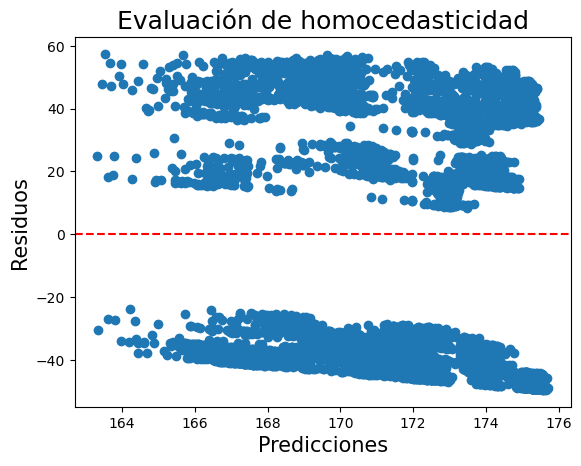

In [32]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

De la gráfica, y como los puntos se dispersan, tenemos un indicador de varianza creciente y, por lo tanto, de heteroscedasticidad.

In [33]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [36]:
pooled_OLS_df = pd.concat([df, residuos_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['Fecha'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(df['Ventas_Semanales']).fillna(0)

In [37]:
pooled_OLS_df

,,Ventas_Semanales,Temperatura,Precio_combustible,IPC,Desempleo,residual
Fecha,Tienda,,,,,,
05-02-2010,1.0,1643690.90,42.31,2.572,211.096358,8.106,42.562995
12-02-2010,1.0,1641957.44,38.51,2.548,211.242170,8.106,42.700125
19-02-2010,1.0,1611968.17,39.93,2.514,211.289143,8.106,42.596898
26-02-2010,1.0,1409727.59,46.63,2.561,211.319643,8.106,41.614483
05-03-2010,1.0,1554806.68,46.50,2.625,211.350143,8.106,42.371606
...,...,...,...,...,...,...,...
28-09-2012,45.0,713173.95,64.88,3.997,192.013558,8.684,18.819735
05-10-2012,45.0,733455.07,64.89,3.985,192.170412,8.667,19.078166
12-10-2012,45.0,734464.36,54.47,4.000,192.327265,8.667,19.240075


In [38]:
breusch_pagan = het_breuschpagan(pooled_OLS_df.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 18.428979569756688, 'LM p-val': 1.7635545016947307e-05, 'F-Stat': 18.476165103568977, 'F p-val': 1.7458111498119532e-05}


Como el p-valor del estadístico de Breush-Pagan es < 0.05 (1.7635545016947307e-05), entonces se rechaza la hipótesis nula, y por lo tanto estamos en la presencia de heterocedasticidad en el término del error.

### No- autocorrelación

In [39]:
from statsmodels.stats.stattools import durbin_watson

In [40]:
durbin_watson = durbin_watson(pooled_OLS_df.residual) 
print(durbin_watson)

0.015293079089814794


En nuestro ejercicio, el resultado es 0.01529, lo que indica claramente una fuerte autocorrelación positiva, violándose el supuesto.

Como las dos secciones del tercer supuesto fueron contradichas, a seguir exploraremos los modelos de efectos fijos y efectos aleatorios:

In [41]:
from linearmodels import PanelOLS
modelo_fe = PanelOLS(y, X, entity_effects = True)
resultados_fe = modelo_fe.fit()
resultados_fe

Dep. Variable:,IPC,R-squared:,0.0050
Estimator:,PanelOLS,R-squared (Between):,-0.0362
No. Observations:,6435,R-squared (Within):,0.0050
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0048
Time:,15:58:09,Log-likelihood,-3.273e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,31.854
Entities:,143,P-value,0.0000
Avg Obs:,45.000,Distribution:,"F(1,6291)"
Min Obs:,45.000,,
Max Obs:,45.000,F-statistic (robust):,31.854


In [42]:
from linearmodels import RandomEffects
modelo_re = RandomEffects(y, X)
resultados_re = modelo_re.fit()
resultados_re

Dep. Variable:,IPC,R-squared:,0.0048
Estimator:,RandomEffects,R-squared (Between):,-0.0346
No. Observations:,6435,R-squared (Within):,0.0050
Date:,"Mon, May 22 2023",R-squared (Overall):,0.0048
Time:,15:58:30,Log-likelihood,-3.275e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,30.954
Entities:,143,P-value,0.0000
Avg Obs:,45.000,Distribution:,"F(1,6433)"
Min Obs:,45.000,,
Max Obs:,45.000,F-statistic (robust):,30.954


Como ambos modelos devuelven resultados similares, para seleccionar el modelo, aplicaremos el test de Hausman.

In [43]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [44]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [45]:
hausman = hausman(resultados_fe, resultados_re) 

In [46]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 0.9083811466311792
degrees of freedom: 2
p-Value:0.6349617149555744


Listo!, dado que el valor p es muy grande (0.6349617149555744), la hipótesis nula no puede rechazarse. En consecuencia, El modelo preferido es el de efectos aleatorios parece ser el más adecuado.

## Entrene al modelo de regresión lineal por sklearn.

In [24]:
df.head()
df = df.drop(columns=["Fecha"])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = df[df.columns.difference(['IPC'])]
y = df.IPC

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =123)
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5791, 5)  <class 'pandas.core.frame.DataFrame'>
(5791,) 	  <class 'pandas.core.series.Series'>
(644, 5)  <class 'pandas.core.frame.DataFrame'>
(644,) 	  <class 'pandas.core.series.Series'>


In [38]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [39]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

1304.4762844982738
1291.4902221781176


In [42]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

36.117534308120675
35.937309612408626


In [43]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

33.0132318584412
32.636225190746664


In [44]:
from sklearn.metrics import r2_score
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.1583299287919031
El R^2 del subconjunto de prueba es: 0.1604218922716889


In [55]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: 275.17874690976885
pendiente: [-6.39786875e+00 -1.71804585e+01  4.30714106e-01 -5.55796784e-01
 -9.46572833e-06]


Al aplicar el modelo de aprendizaje automático no se tiene un r^2 un buen índice como predictor. 